## Exploratory Data Analysis

#### Importing Libraries

In [36]:
import sys
sys.path.append('../')
import pandas as pd
from src.descriptive_statistics import describe_numerical, summarize_categorical, summarize_time_series
from src.plots import display_summary_table, plot_categorical_distribution, plot_time_series
import matplotlib.pyplot as plt

#### Loading Data

In [37]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_store = pd.read_csv('../data/store.csv')

C:\Users\abraham.shimelis\AppData\Local\Temp\ipykernel_3108\267565919.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../data/train.csv')


In [38]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [39]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [40]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Catagorization

In [41]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [42]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [44]:
# Remove leading and trailing whitespaces
df_train['StateHoliday'] = df_train['StateHoliday'].str.strip()
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [46]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [47]:
print(df_train.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [48]:
# Separate categorical, numerical and date columns
df_train_cat = df_train[['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
df_train_num = df_train[['Sales', 'Customers']]
df_train_date = df_train[['Date']]

In [49]:
print(df_test.columns)

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')


In [50]:
# Separate categorical, numerical and date columns
df_test_cat = df_test[['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
df_test_date = df_test[['Date']]

In [51]:
print(df_store.columns)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [52]:
# Separate categorical, numerical and date columns
df_store_cat = df_store[['StoreType', 'Assortment', 'Promo2', 'PromoInterval']]
df_store_num = df_store[['CompetitionDistance', 'Promo2SinceWeek', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2SinceYear']]

#### Data Summarization

In [53]:
print(df_train_cat.columns)

Index(['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'], dtype='object')


In [54]:
train_cat_summary = summarize_categorical(df_train_cat)
display_summary_table(train_cat_summary)


DayOfWeek:
+----+-------------+---------+
|    |   DayOfWeek |   count |
|----+-------------+---------|
|  0 |           5 |  145845 |
|  1 |           4 |  145845 |
|  2 |           3 |  145665 |
|  3 |           2 |  145664 |
|  4 |           1 |  144730 |
|  5 |           7 |  144730 |
|  6 |           6 |  144730 |
+----+-------------+---------+

Open:
+----+--------+---------+
|    |   Open |   count |
|----+--------+---------|
|  0 |      1 |  844392 |
|  1 |      0 |  172817 |
+----+--------+---------+

Promo:
+----+---------+---------+
|    |   Promo |   count |
|----+---------+---------|
|  0 |       0 |  629129 |
|  1 |       1 |  388080 |
+----+---------+---------+

StateHoliday:
+----+----------------+---------+
|    | StateHoliday   |   count |
|----+----------------+---------|
|  0 | 0              |  855087 |
|  1 | a              |   20260 |
|  2 | b              |    6690 |
|  3 | c              |    4100 |
+----+----------------+---------+

SchoolHoliday:
+----+-----

In [55]:
train_num_desc = describe_numerical(df_train_num)
display_summary_table(train_num_desc)


Sales:
+----+---------+-----------------+
|    | index   |           Sales |
|----+---------+-----------------|
|  0 | count   |     1.01721e+06 |
|  1 | mean    |  5773.82        |
|  2 | std     |  3849.93        |
|  3 | min     |     0           |
|  4 | 25%     |  3727           |
|  5 | 50%     |  5744           |
|  6 | 75%     |  7856           |
|  7 | max     | 41551           |
+----+---------+-----------------+

Customers:
+----+---------+----------------+
|    | index   |      Customers |
|----+---------+----------------|
|  0 | count   |    1.01721e+06 |
|  1 | mean    |  633.146       |
|  2 | std     |  464.412       |
|  3 | min     |    0           |
|  4 | 25%     |  405           |
|  5 | 50%     |  609           |
|  6 | 75%     |  837           |
|  7 | max     | 7388           |
+----+---------+----------------+


In [56]:
print(df_train_date.columns)

Index(['Date'], dtype='object')


In [57]:
summarize_time_series(df_train_date, 'Date')

Number of Unique Dates: 942
Start Date: 2013-01-01 00:00:00
End Date: 2015-07-31 00:00:00


In [58]:
test_cat_summary = summarize_categorical(df_test_cat)
display_summary_table(test_cat_summary)


DayOfWeek:
+----+-------------+---------+
|    |   DayOfWeek |   count |
|----+-------------+---------|
|  0 |           4 |    5992 |
|  1 |           3 |    5992 |
|  2 |           2 |    5992 |
|  3 |           1 |    5992 |
|  4 |           7 |    5992 |
|  5 |           6 |    5992 |
|  6 |           5 |    5136 |
+----+-------------+---------+

Open:
+----+--------+---------+
|    |   Open |   count |
|----+--------+---------|
|  0 |      1 |   35093 |
|  1 |      0 |    5984 |
+----+--------+---------+

Promo:
+----+---------+---------+
|    |   Promo |   count |
|----+---------+---------|
|  0 |       0 |   24824 |
|  1 |       1 |   16264 |
+----+---------+---------+

StateHoliday:
+----+----------------+---------+
|    | StateHoliday   |   count |
|----+----------------+---------|
|  0 | 0              |   40908 |
|  1 | a              |     180 |
+----+----------------+---------+

SchoolHoliday:
+----+-----------------+---------+
|    |   SchoolHoliday |   count |
|----+---

In [59]:
print(df_test_date.columns)

Index(['Date'], dtype='object')


In [60]:
summarize_time_series(df_test_date, 'Date')

Number of Unique Dates: 48
Start Date: 2015-08-01 00:00:00
End Date: 2015-09-17 00:00:00


In [61]:
store_cat_summary = summarize_categorical(df_store_cat)
display_summary_table(store_cat_summary)


StoreType:
+----+-------------+---------+
|    | StoreType   |   count |
|----+-------------+---------|
|  0 | a           |     602 |
|  1 | d           |     348 |
|  2 | c           |     148 |
|  3 | b           |      17 |
+----+-------------+---------+

Assortment:
+----+--------------+---------+
|    | Assortment   |   count |
|----+--------------+---------|
|  0 | a            |     593 |
|  1 | c            |     513 |
|  2 | b            |       9 |
+----+--------------+---------+

Promo2:
+----+----------+---------+
|    |   Promo2 |   count |
|----+----------+---------|
|  0 |        1 |     571 |
|  1 |        0 |     544 |
+----+----------+---------+

PromoInterval:
+----+------------------+---------+
|    | PromoInterval    |   count |
|----+------------------+---------|
|  0 | Jan,Apr,Jul,Oct  |     335 |
|  1 | Feb,May,Aug,Nov  |     130 |
|  2 | Mar,Jun,Sept,Dec |     106 |
+----+------------------+---------+


In [62]:
store_num_desc = describe_numerical(df_store_num)
display_summary_table(store_num_desc)


CompetitionDistance:
+----+---------+-----------------------+
|    | index   |   CompetitionDistance |
|----+---------+-----------------------|
|  0 | count   |               1112    |
|  1 | mean    |               5404.9  |
|  2 | std     |               7663.17 |
|  3 | min     |                 20    |
|  4 | 25%     |                717.5  |
|  5 | 50%     |               2325    |
|  6 | 75%     |               6882.5  |
|  7 | max     |              75860    |
+----+---------+-----------------------+

Promo2SinceWeek:
+----+---------+-------------------+
|    | index   |   Promo2SinceWeek |
|----+---------+-------------------|
|  0 | count   |          571      |
|  1 | mean    |           23.5954 |
|  2 | std     |           14.142  |
|  3 | min     |            1      |
|  4 | 25%     |           13      |
|  5 | 50%     |           22      |
|  6 | 75%     |           37      |
|  7 | max     |           50      |
+----+---------+-------------------+

CompetitionOpenSinceYea

#### Bivariate and Multivariate Analysis

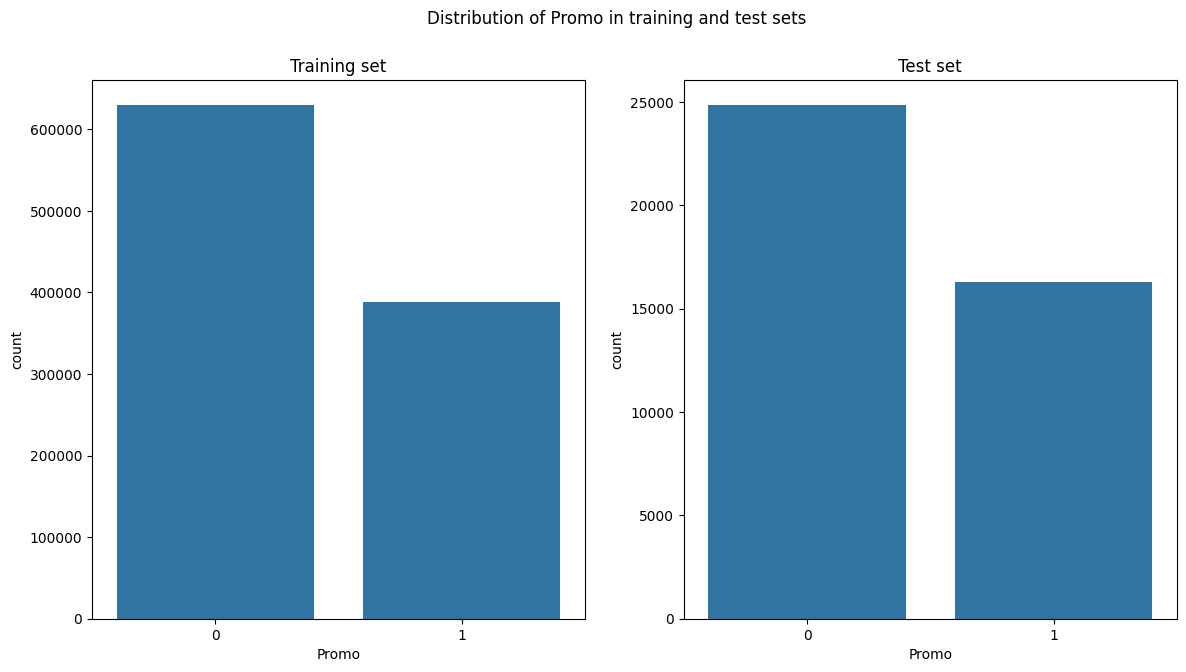

In [63]:
# check distribution on both training and test tests, are promotions distributed similarly between these two groups 
plot_categorical_distribution(df_train, df_test, 'Promo')

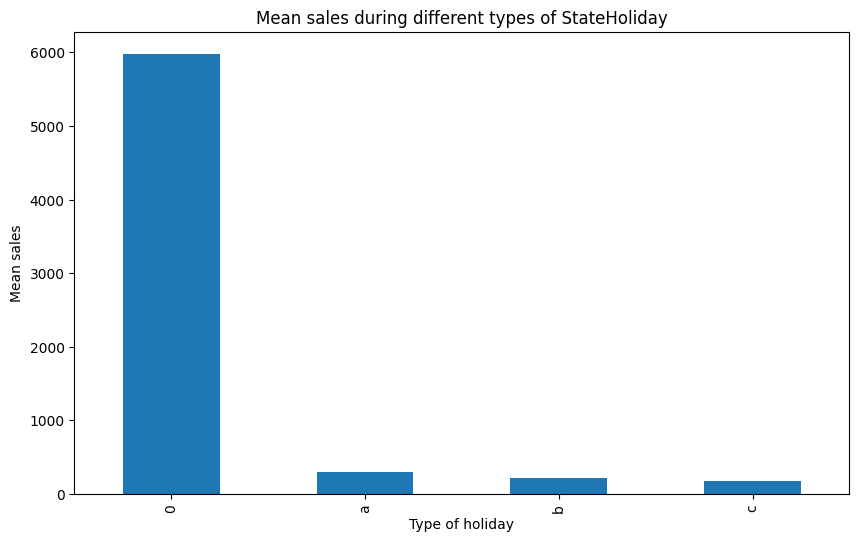

In [64]:
# check & compare sales behavior before. during and after holidays 
mean_sales = df_train.groupby('StateHoliday')['Sales'].mean()

# Plot the mean sales
mean_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Type of holiday')
plt.ylabel('Mean sales')
plt.title('Mean sales during different types of StateHoliday')
plt.show()


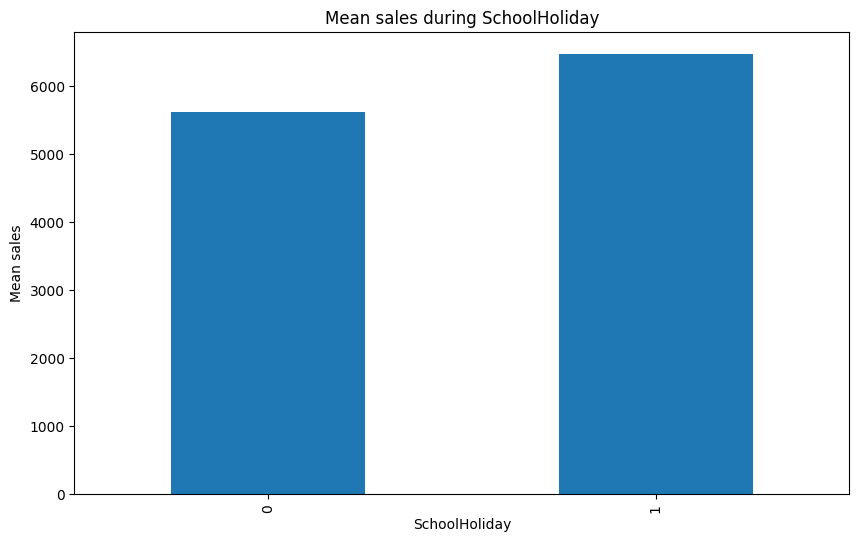

In [65]:
# check & compare sales behavior before. during and after holidays 
mean_sales = df_train.groupby('SchoolHoliday')['Sales'].mean()

# Plot the mean sales
mean_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('SchoolHoliday')
plt.ylabel('Mean sales')
plt.title('Mean sales during SchoolHoliday')
plt.show()

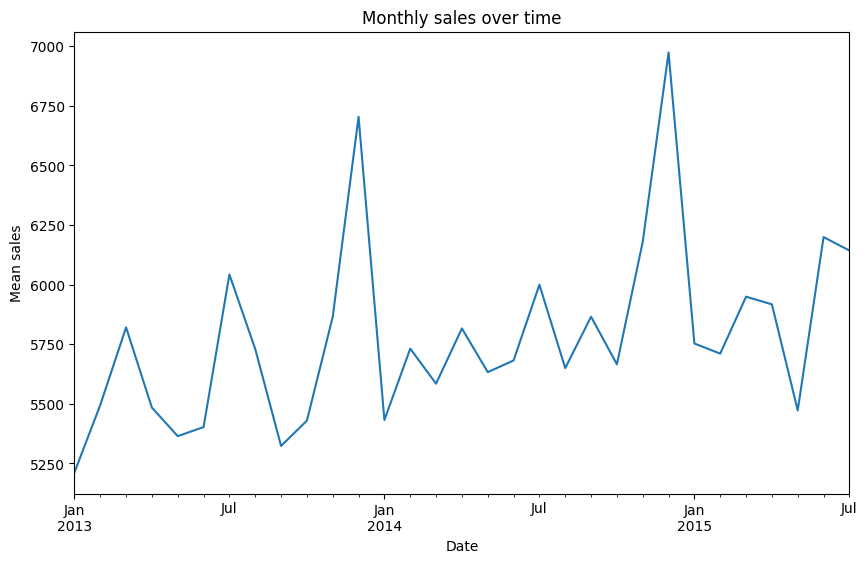

In [66]:
# find out any seasonal purchase behaviors 
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Set 'date' as the index
df_train.set_index('Date', inplace=True)

# Resample the data to monthly frequency and calculate the mean sales
monthly_sales = df_train['Sales'].resample('ME').mean()

# Plot the monthly sales
monthly_sales.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Mean sales')
plt.title('Monthly sales over time')
plt.show()

In [68]:
# correlation between sales and number of customers 
correlation = df_train['Sales'].corr(df_train['Customers'])

print(f'The correlation between sales and the number of customers is: {correlation}')

The correlation between sales and the number of customers is: 0.8947107733017018


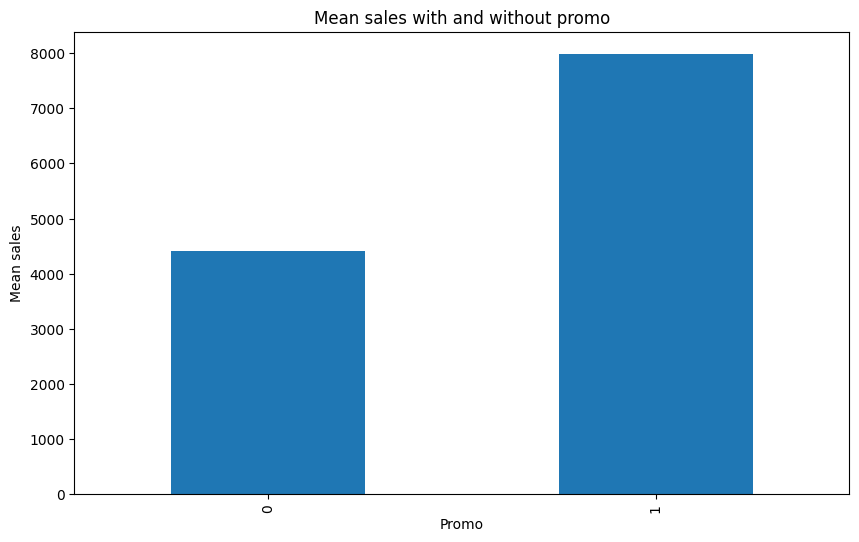

In [69]:
# How does promo affect sales? 
mean_sales = df_train.groupby('Promo')['Sales'].mean()

# Plot the mean sales
mean_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Promo')
plt.ylabel('Mean sales')
plt.title('Mean sales with and without promo')
plt.show()

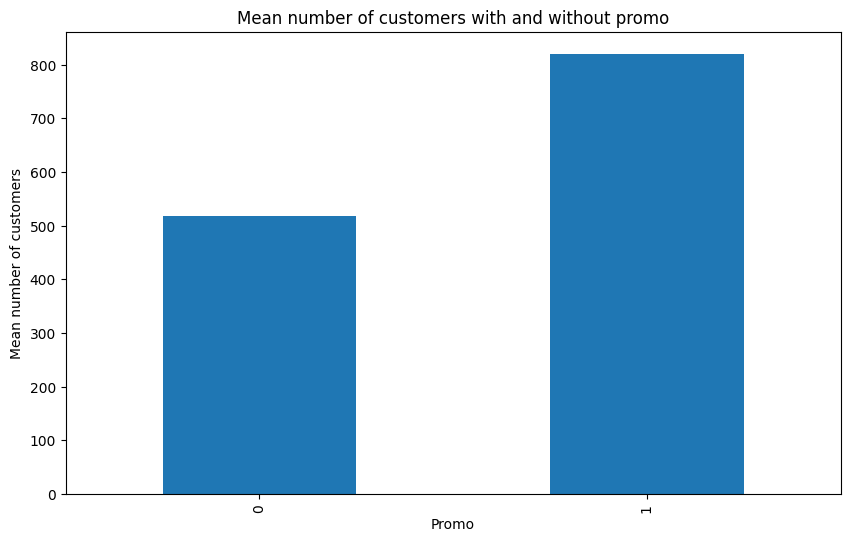

In [70]:
# Are the promos attracting more customers 
mean_customers = df_train.groupby('Promo')['Customers'].mean()

# Plot the mean number of customers
mean_customers.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Promo')
plt.ylabel('Mean number of customers')
plt.title('Mean number of customers with and without promo')
plt.show()


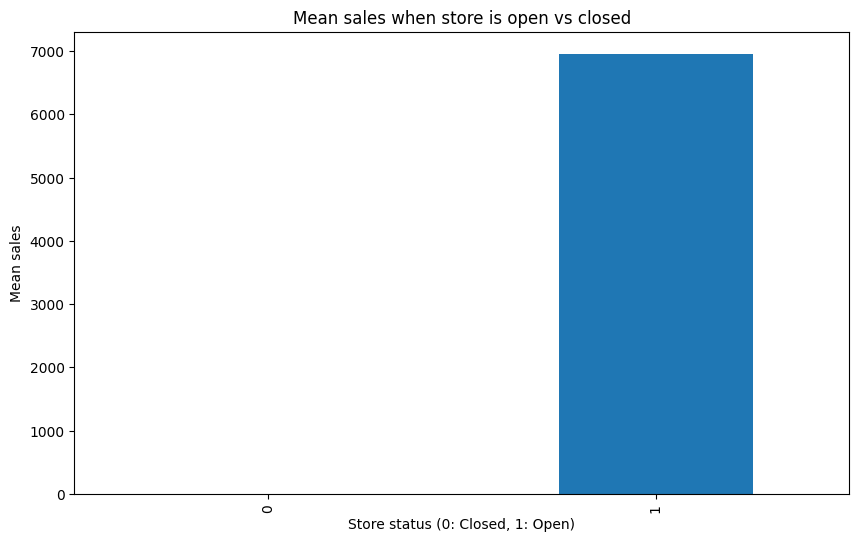

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns 'Sales', 'Customers', and 'Open'
# 'Open' is a categorical column with values 0 (store closed) and 1 (store open)

# Group by the 'Open' column and calculate the mean sales
mean_sales = df_train.groupby('Open')['Sales'].mean()

# Plot the mean sales
mean_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Store status (0: Closed, 1: Open)')
plt.ylabel('Mean sales')
plt.title('Mean sales when store is open vs closed')
plt.show()
